In [98]:
import sys
sys.path.append('../')

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from fastdtw import fastdtw


In [100]:
plt.style.use("ggplot")

In [101]:
path = "../data/final/05_returns_merge_rw_12M.csv"

In [102]:
path2 = "../data/final/06_vol_merge_rm_12M.csv"

In [103]:
path_load = "../reports/figures/"

In [127]:
df = pd.read_csv(path)
df2 = pd.read_csv(path2)

In [128]:
df2.drop(columns=["Unnamed: 0",'Volatilidade_data'],inplace=True)
#df2["Volatilidade_IBOV"] = df2["Volatilidade_IBOV"]/100
df2 = df2[["Volatilidade_CDI","Volatilidade_IMAB5","Volatilidade_IMAB","Volatilidade_IHFA","Volatilidade_IBOV","Volatilidade_port1","Volatilidade_port4","Volatilidade_port8"]]
#df2.iloc[:,0:4] = df2.iloc[:,0:4]*100

In [130]:
def distance_using_fastdtw_returns(df):
  
  series_y = df["Variação_12_Meses_(%)_port1"].values
  series_z = df["Variação_12_Meses_(%)_port4"].values
  series_a = df["Variação_12_Meses_(%)_port8"].values
  
  portfolios = ["Port1","Port4","Port8"]
  lista_benchmark = ["CDI","IMAB5","IMAB","IHFA","IBOV"]
  series_portfolios = [series_y,series_z,series_a]
  x= []
  lista = []
  
  for benchmark in lista_benchmark:
    i = 0
    series_x = np.array(df[f'Variação_12_Meses_(%)_{benchmark}'])
    for series in series_portfolios:
      lista.append(f'{benchmark}x{portfolios[i]}')
      x.append(round(fastdtw(series_x,series)[0],4))
      #x.append(round(fastdtw(series_x,series)[0],4))
      #print(f'Distancia {benchmark} x {portfolios[i]}: {round(fastdtw(series_x,series)[0],4)}')
      i= i+1
  return x,lista

In [131]:
def distance_using_fastdtw_vol(df):
  
  series_y = df["Volatilidade_port1"].values
  series_z = df["Volatilidade_port4"].values
  series_a = df["Volatilidade_port8"].values
  
  portfolios = ["Port1","Port4","Port8"]
  lista_benchmark = ["CDI","IMAB5","IMAB","IHFA","IBOV"]
  series_portfolios = [series_y,series_z,series_a]
  x= []
  lista = []
  
  for benchmark in lista_benchmark:
    i = 0
    series_x = np.array(df[f'Volatilidade_{benchmark}'])
    for series in series_portfolios:
      #lista.append(f'{benchmark}x{portfolios[i]}')
      x.append(round(fastdtw(series_x,series)[0],4))
      #x.append(round(fastdtw(series_x,series)[0],4))
      #print(f'Distancia {benchmark} x {portfolios[i]}: {round(fastdtw(series_x,series)[0],4)}')
      i= i+1
  return x

In [132]:
def replace_values(df):
  old_values = df["Cluster"].unique()
  new_values = ["Grupo1","Grupo2","Grupo3","Grupo4"]
  df.replace(old_values,new_values,inplace=True)
  
  return df

In [133]:
x = distance_using_fastdtw_returns(df)
y = distance_using_fastdtw_vol(df2)

In [152]:
df_teste = pd.DataFrame(x[0])
df_teste.columns = ["DTW_Returns"]
df_teste["benchmark"] =x[1] 
df_teste["DTW_Volatility"] = y

In [154]:
df_teste2 = df_teste.copy()

In [135]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_scaled = df_teste.copy()
# df_scaled.iloc[:,[0,2]] = pd.DataFrame(scaler.fit_transform(df_scaled.iloc[:,[0,2]]),columns=df_scaled.iloc[:,[0,1]].columns)

In [155]:
series = df_teste[["DTW_Returns"]]
series2 = df_teste[["DTW_Returns","DTW_Volatility"]]

In [200]:
series2

,DTW_Returns,DTW_Volatility
0,24.1664,59.8623
1,60.4349,118.7369
2,102.2968,137.2448
3,23.1717,16.2526
4,32.1826,34.2370
5,54.5282,51.4583
6,104.1813,129.1405
7,65.5840,42.2300
8,40.6891,54.0728
9,17.9314,22.5073


In [156]:
num_clusters=4
kmodel = KMeans(n_clusters=num_clusters,random_state=42)
clusters = kmodel.fit(series)

c:\Users\davi_\OneDrive\Documentos\GitHub\estudo_benchmark\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [157]:
num_clusters=4
kmodel = KMeans(n_clusters=num_clusters,random_state=42)
clusters2 = kmodel.fit(series2)

c:\Users\davi_\OneDrive\Documentos\GitHub\estudo_benchmark\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [158]:
df_teste["Cluster"] = clusters.labels_
df_teste = replace_values(df_teste)

df_teste2["Cluster"] = clusters2.labels_
df_teste2 = replace_values(df_teste2)


In [159]:
groups1 = df_teste.groupby("Cluster")
groups2 =df_teste.groupby("benchmark")
groups3 = df_teste2.groupby("Cluster")
groups4 =df_teste.groupby("benchmark")

C:\Users\davi_\AppData\Local\Temp\ipykernel_13576\1524373449.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


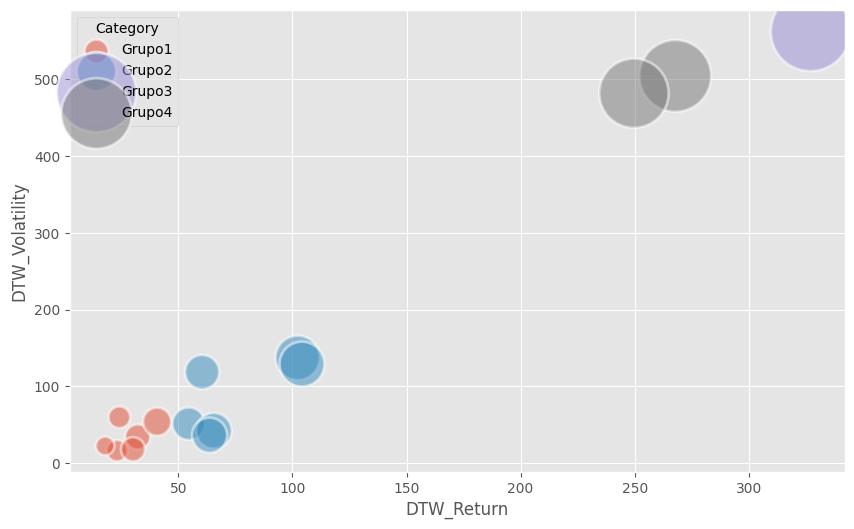

In [146]:
fig,ax=plt.subplots(figsize=(10,6))
for i,(name,group) in enumerate(groups1):
  ax.scatter(
    group["DTW_Returns"],
    group["DTW_Volatility"],
    s=group["DTW_Returns"]*10,
    cmap="Blues",
    label=name,
    alpha=0.5,
    edgecolors='White',
    linewidth=2
  );
# Set the axis labels and legend
ax.set_xlabel('DTW_Return')
ax.set_ylabel('DTW_Volatility')
ax.legend(title='Category')
fig.savefig(path_load+"K_means_Clusters.png");

C:\Users\davi_\AppData\Local\Temp\ipykernel_13576\3810135717.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


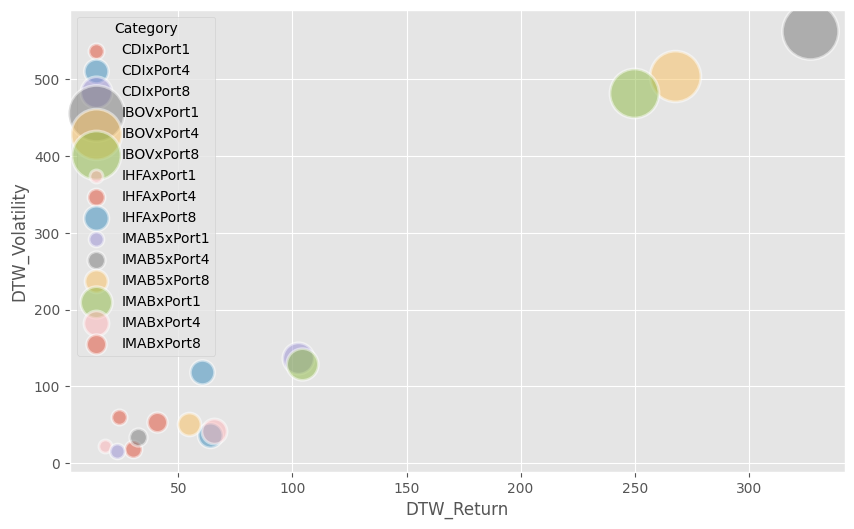

In [147]:
fig,ax=plt.subplots(figsize=(10,6))
for i,(name,group) in enumerate(groups2):
  ax.scatter(
    group["DTW_Returns"],
    group["DTW_Volatility"],
    s=group["DTW_Returns"]*5,
    cmap="Blues",
    label=name,
    alpha=0.5,
    edgecolors='White',
    linewidth=2
  );
# Set the axis labels and legend
ax.set_xlabel('DTW_Return')
ax.set_ylabel('DTW_Volatility')
ax.legend(title='Category')
fig.savefig(path_load+"K_means_Benchmarks.png");

In [162]:
df_teste.sort_values(by="Cluster")

,DTW_Returns,benchmark,DTW_Volatility,Cluster
0,24.1664,CDIxPort1,59.8623,Grupo1
3,23.1717,IMAB5xPort1,16.2526,Grupo1
4,32.1826,IMAB5xPort4,34.2370,Grupo1
8,40.6891,IMABxPort8,54.0728,Grupo1
9,17.9314,IHFAxPort1,22.5073,Grupo1
10,30.1439,IHFAxPort4,18.1541,Grupo1
1,60.4349,CDIxPort4,118.7369,Grupo2
2,102.2968,CDIxPort8,137.2448,Grupo2
5,54.5282,IMAB5xPort8,51.4583,Grupo2
6,104.1813,IMABxPort1,129.1405,Grupo2


C:\Users\davi_\AppData\Local\Temp\ipykernel_13576\3519450611.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


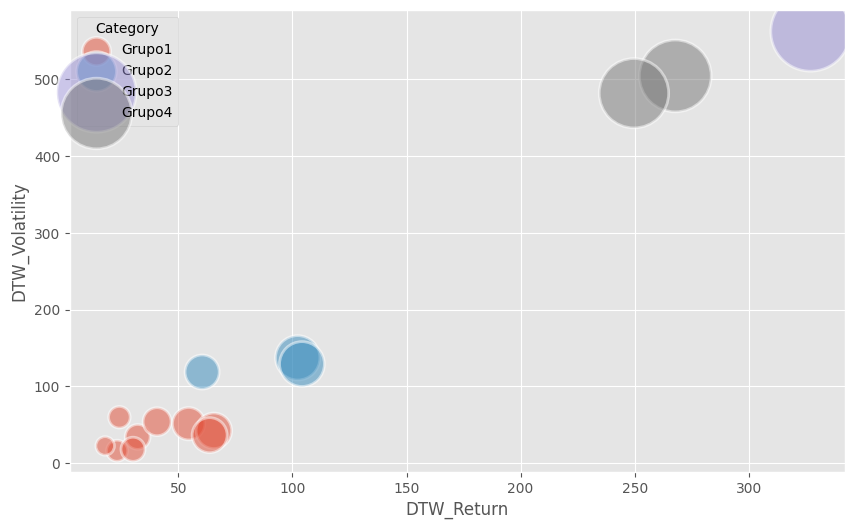

In [160]:
fig,ax=plt.subplots(figsize=(10,6))
for i,(name,group) in enumerate(groups3):
  ax.scatter(
    group["DTW_Returns"],
    group["DTW_Volatility"],
    s=group["DTW_Returns"]*10,
    cmap="Blues",
    label=name,
    alpha=0.5,
    edgecolors='White',
    linewidth=2
  );
# Set the axis labels and legend
ax.set_xlabel('DTW_Return')
ax.set_ylabel('DTW_Volatility')
ax.legend(title='Category')
fig.savefig(path_load+"K_means_Clusters2.png");

C:\Users\davi_\AppData\Local\Temp\ipykernel_13576\3149202009.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


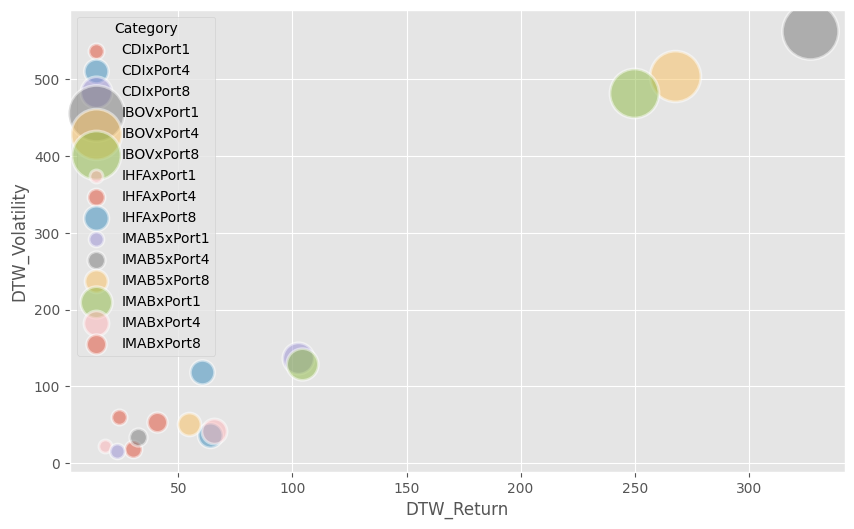

In [161]:
fig,ax=plt.subplots(figsize=(10,6))
for i,(name,group) in enumerate(groups4):
  ax.scatter(
    group["DTW_Returns"],
    group["DTW_Volatility"],
    s=group["DTW_Returns"]*5,
    cmap="Blues",
    label=name,
    alpha=0.5,
    edgecolors='White',
    linewidth=2
  );
# Set the axis labels and legend
ax.set_xlabel('DTW_Return')
ax.set_ylabel('DTW_Volatility')
ax.legend(title='Category')
fig.savefig(path_load+"K_means_Benchmarks2.png");

In [198]:
pd.pivot_table(df_teste,index=["Cluster","benchmark"]).iloc[:]

DTW_Returns  DTW_Volatility
Cluster benchmark                               
Grupo1  CDIxPort1        24.1664         59.8623
        IHFAxPort1       17.9314         22.5073
        IHFAxPort4       30.1439         18.1541
        IMAB5xPort1      23.1717         16.2526
        IMAB5xPort4      32.1826         34.2370
        IMABxPort8       40.6891         54.0728
Grupo2  CDIxPort4        60.4349        118.7369
        CDIxPort8       102.2968        137.2448
        IHFAxPort8       63.7073         36.5066
        IMAB5xPort8      54.5282         51.4583
        IMABxPort1      104.1813        129.1405
        IMABxPort4       65.5840         42.2300
Grupo3  IBOVxPort1      326.6779        563.2482
Grupo4  IBOVxPort4      267.7777        504.3736
        IBOVxPort8      249.6653        481.8389

In [199]:
pd.pivot_table(df_teste2,index=["Cluster","benchmark"]).iloc[:]

DTW_Returns  DTW_Volatility
Cluster benchmark                               
Grupo1  CDIxPort1        24.1664         59.8623
        IHFAxPort1       17.9314         22.5073
        IHFAxPort4       30.1439         18.1541
        IHFAxPort8       63.7073         36.5066
        IMAB5xPort1      23.1717         16.2526
        IMAB5xPort4      32.1826         34.2370
        IMAB5xPort8      54.5282         51.4583
        IMABxPort4       65.5840         42.2300
        IMABxPort8       40.6891         54.0728
Grupo2  CDIxPort4        60.4349        118.7369
        CDIxPort8       102.2968        137.2448
        IMABxPort1      104.1813        129.1405
Grupo3  IBOVxPort1      326.6779        563.2482
Grupo4  IBOVxPort4      267.7777        504.3736
        IBOVxPort8      249.6653        481.8389

In [186]:
df_teste.sort_values(by="Cluster")

,DTW_Returns,benchmark,DTW_Volatility,Cluster
0,24.1664,CDIxPort1,59.8623,Grupo1
3,23.1717,IMAB5xPort1,16.2526,Grupo1
4,32.1826,IMAB5xPort4,34.2370,Grupo1
8,40.6891,IMABxPort8,54.0728,Grupo1
9,17.9314,IHFAxPort1,22.5073,Grupo1
10,30.1439,IHFAxPort4,18.1541,Grupo1
1,60.4349,CDIxPort4,118.7369,Grupo2
2,102.2968,CDIxPort8,137.2448,Grupo2
5,54.5282,IMAB5xPort8,51.4583,Grupo2
6,104.1813,IMABxPort1,129.1405,Grupo2


In [188]:
df_teste.sort_values(by="Cluster").groupby("Cluster").agg()


TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [170]:
df_teste2.sort_values(by="Cluster").groupby("Cluster").count()

,DTW_Returns,benchmark,DTW_Volatility
Cluster,,,
Grupo1,9,9,9
Grupo2,3,3,3
Grupo3,1,1,1
Grupo4,2,2,2
